In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [ ]:
df = pd.read_csv("Reviews.csv")

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df = df.head(5000)
df.shape

(5000, 10)

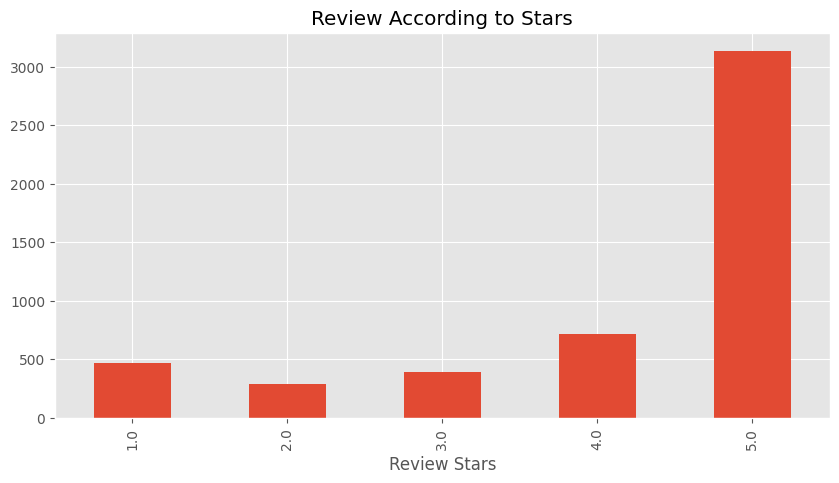

In [ ]:
ax =df['Score'].value_counts().sort_index().\
  plot(kind='bar',title='Review According to Stars',figsize=(10,5))
ax.set_xlabel("Review Stars")
plt.show()

# Vader


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
SIA = SentimentIntensityAnalyzer()

In [ ]:
SIA.polarity_scores("Adolf Hiltler loved drinking orange juice")

{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.5994}

In [ ]:
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myId = row['Id']
    res[myId] = SIA.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
vaders_result = pd.DataFrame(res).T
vaders_result = vaders_result.reset_index().rename(columns={'index':'Id','compound':'Compound','neg':'Vad_Neg','neu':'Vad_Neu','pos':'Vad_Pos'})
vaders_result = vaders_result.merge(df)

In [ ]:
vaders_result

,Id,Neg,Neu,Pos,Compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193,B00653KJ5M,AGE64SY3HP9RV,CZ,1.0,1.0,2.0,1.341274e+09,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,0.026,0.764,0.210,0.9846,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1.0,1.0,1.0,1.341101e+09,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,0.097,0.827,0.076,-0.0554,B00653KJ5M,A1T6I625FGQS20,IL,1.0,1.0,3.0,1.336694e+09,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,0.154,0.637,0.209,0.9078,B00653KJ5M,A3POAWC2JPQQQP,me,0.0,0.0,4.0,1.342138e+09,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


# Plotting Vaders Result

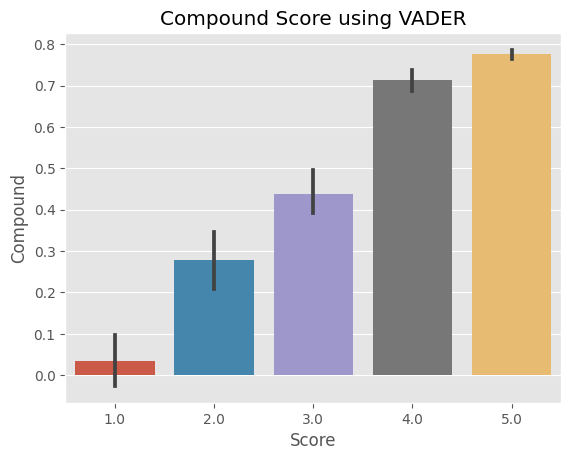

In [ ]:
ax = sns.barplot(data=vaders_result, x='Score', y='Compound')
ax.set_title("Compound Score using VADER")
plt.show()

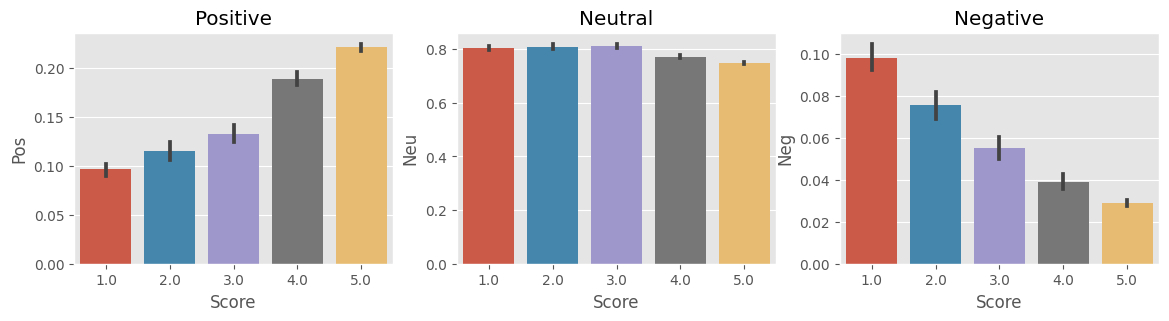

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(14,3))
sns.barplot(data=vaders_result,x='Score',y='Pos',ax=axs[0])
sns.barplot(data=vaders_result,x='Score',y='Neu',ax=axs[1])
sns.barplot(data=vaders_result,x='Score',y='Neg',ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.show()

# Roberta (Latest Version)

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def polarity_roberta(eg):
  text = tokenizer(eg, return_tensors='pt')
  output = model(**text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict


In [ ]:
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
    try:
      text = row['Text']
      myId = row['Id']
      vader_result = SIA.polarity_scores(text)
      vader_rename = {}
      for key, value in vader_result.items():
        vader_rename[f"vader_{key}"] = value
      roberta_result = polarity_roberta(text)
      both = {**vader_rename,**roberta_result}
      res[myId] = both
    except RuntimeError:
      print(f"Broke for id {myId}")

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583


In [ ]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index':'Id'})
result_df = result_df.merge(df, how='left')

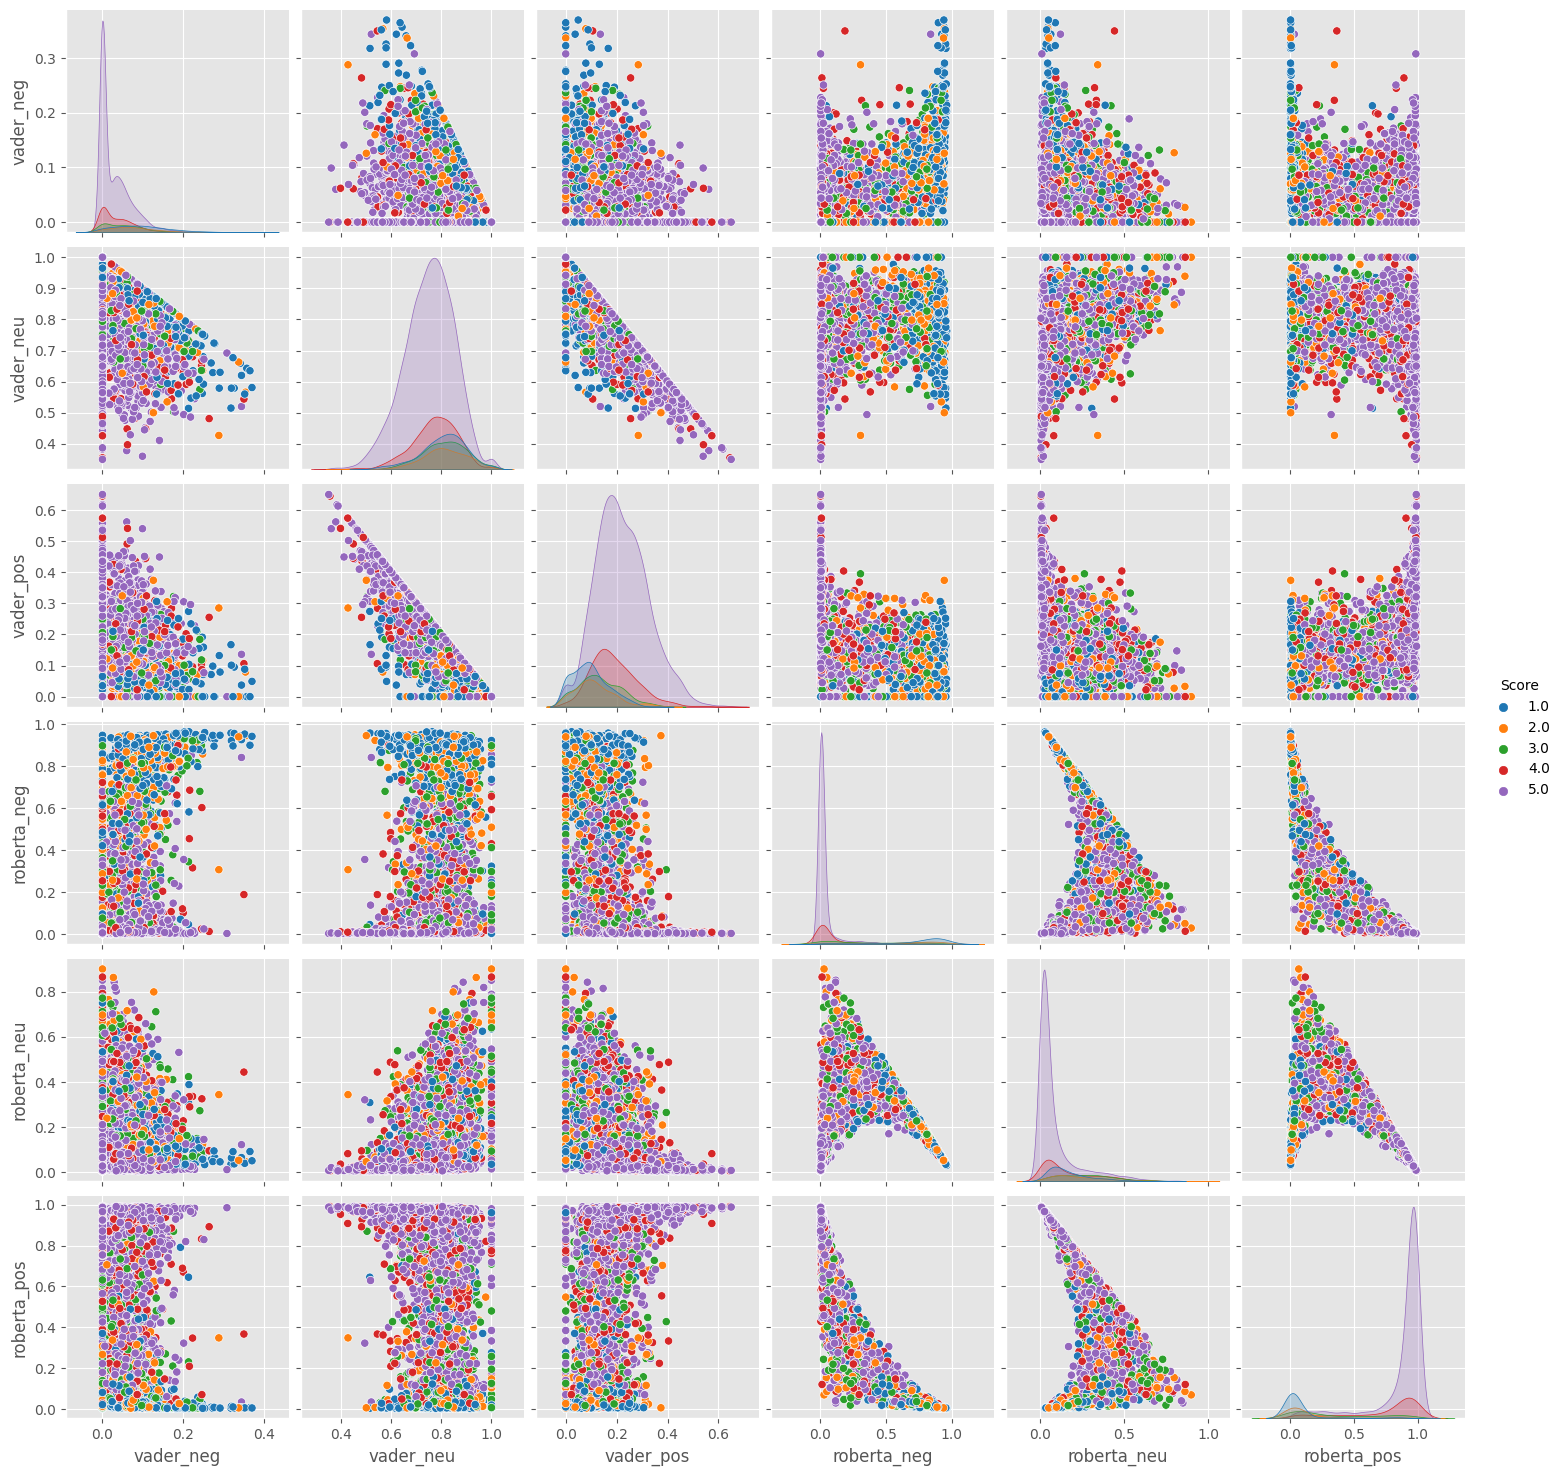

In [ ]:
sns.pairplot(data=result_df,
             vars=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()